<h1>Importing the python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kstest

<h1> Importing the data set

In [ ]:
!gdown https://drive.google.com/uc?id=1fMo4Y25KsVtTWcsjZ3wGsiUjBEO9Wcn6

Downloading...
From: https://drive.google.com/uc?id=1fMo4Y25KsVtTWcsjZ3wGsiUjBEO9Wcn6
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 103MB/s]


In [ ]:
df = pd.read_csv('walmart_data.csv')

<h1> Preliminary checking

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
219556,1003841,P00182242,M,46-50,18,A,4+,0,1,11782
85229,1001164,P00110842,F,26-35,19,A,1,1,1,11699
426469,1005659,P00117442,M,26-35,0,C,3,1,5,8678
308625,1005555,P00057542,M,0-17,10,B,2,0,3,8319
354073,1000549,P00202042,M,26-35,6,A,3,0,8,7849


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include = "object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
1004007  P00105342   M       36-45  12          A              1                           1               1                 11668       1
         P00115942   M       36-45  12          A              1                           1               8                 9800        1
         P00115142   M       36-45  12          A              1                           1               1                 11633       1
         P00114942   M       36-45  12          A              1                           1               1                 19148       1
                                                                                                                                        ..
1001973  P00265242   M       26-35  1           A              0                           0               5                 8659        1
         P00226342   M       26-35  1           A              0                           0               11                6112        1
         P00198042   M       26-35  1           A              0                           0               11                5915        1
         P00129842   M       26-35  1           A              0                           0               6                 16101       1
1006040  P00349442   M       26-35  6           B              2                           0               6                 16389       1
Name: count, Length: 550068, dtype: int64

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1


In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Occupation'].nunique()

21

In [ ]:
df['City_Category'].nunique()

3

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [ ]:
df['Product_Category'].nunique()

20

<h1>Preliminary Analysis

<h2>Changing the numerical columns "Marital_Status", "Occupation" and "Product_Category" to categorcial columns

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype("category")
df['Product_Category'] = df['Product_Category'].astype("category")
df['Occupation'] = df['Occupation'].astype("category")

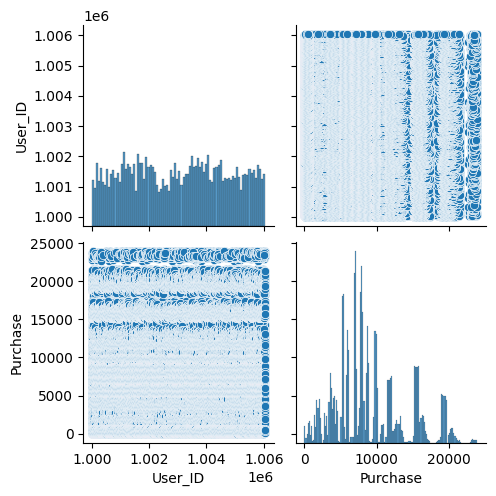

In [ ]:
sns.pairplot(df)
plt.show()

<H1>NULL values and Outliers

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no missing or null values.

<h2>Identifying Outliers

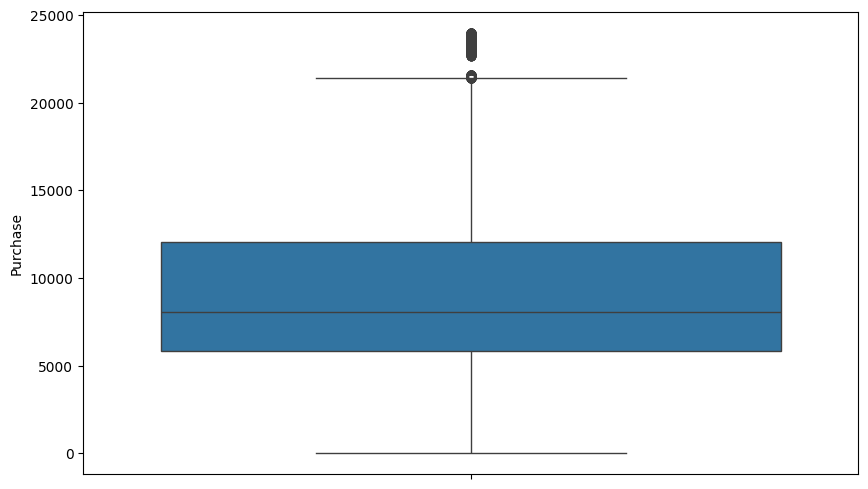

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, y = "Purchase")
plt.show()

<h2>Cliping the data between 5th and 95th percentile

In [ ]:
lower_bound = df['Purchase'].quantile(0.05)
upper_bound = df['Purchase'].quantile(0.95)
df['Purchase_clipped'] = np.clip(df['Purchase'], lower_bound, upper_bound)

In [ ]:
df1 = df.drop('Purchase', axis = 1)
df1 = df1.rename(columns = {'Purchase_clipped': 'Purchase'})

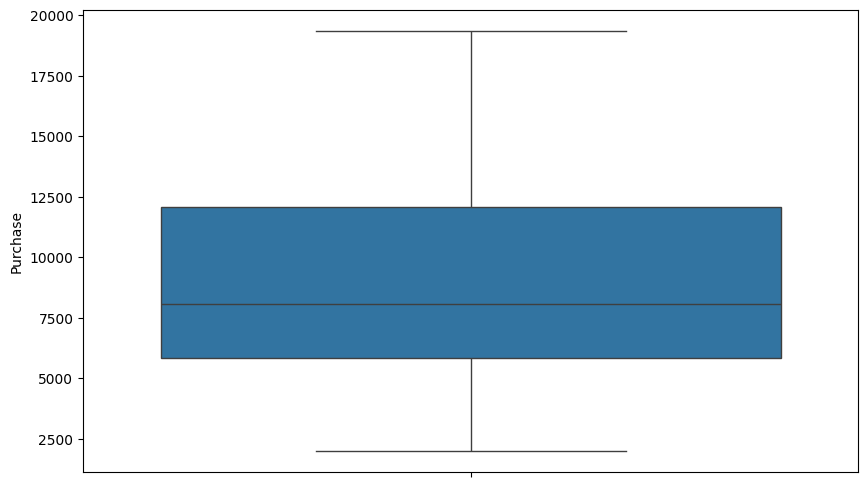

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df1, y = "Purchase")
plt.show()

<h1>Data exploration

<h2>Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

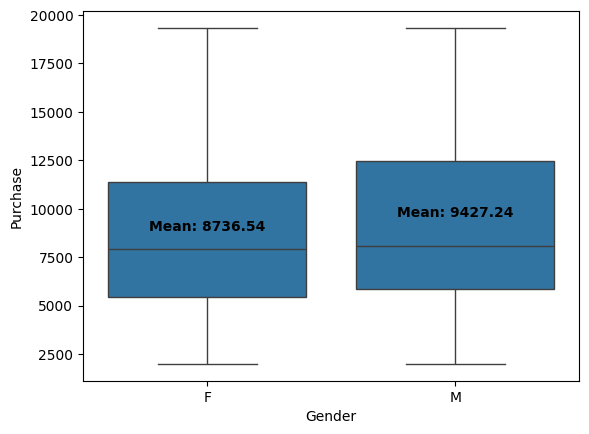

In [ ]:
sns.boxplot(data = df1, x = "Gender", y = "Purchase")
mean_values = df1.groupby('Gender')['Purchase'].mean()
for gender in mean_values.index:
    plt.annotate(f'Mean: {mean_values[gender]:.2f}',
                 xy=(gender, mean_values[gender]),
                 xytext=(gender, mean_values[gender] + 5),
                 ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

Finding: The average amount spent by male customers are slightly higher than the female customers

<h2>The interval within which the average spending of 50 million male and female customers may lie

In [ ]:
female_spending = df1[df1['Gender'] == 'F']['Purchase']
male_spending = df1[df1['Gender'] == 'M']['Purchase']

sample_mean_f = np.mean(female_spending)
sample_mean_m = np.mean(male_spending)

sample_std_f = np.std(female_spending, ddof=1)
sample_std_m = np.std(female_spending, ddof=1)

sample_size_f = len(female_spending)
sample_size_m = len(male_spending)

standard_error_f = sample_std_f / np.sqrt(sample_size_f)
standard_error_m = sample_std_m / np.sqrt(sample_size_m)

confidence_level_1 = 0.90
confidence_level_2 = 0.95
confidence_level_3 = 0.99

degrees_of_freedom_f = sample_size_f - 1
degrees_of_freedom_m = sample_size_m - 1

t_value_f_1 = stats.t.ppf(1 - (1 - confidence_level_1) / 2, degrees_of_freedom_f)
t_value_m_1 = stats.t.ppf(1 - (1 - confidence_level_1) / 2, degrees_of_freedom_m)

t_value_f_2 = stats.t.ppf(1 - (1 - confidence_level_2) / 2, degrees_of_freedom_f)
t_value_m_2 = stats.t.ppf(1 - (1 - confidence_level_2) / 2, degrees_of_freedom_m)

t_value_f_3 = stats.t.ppf(1 - (1 - confidence_level_3) / 2, degrees_of_freedom_f)
t_value_m_3 = stats.t.ppf(1 - (1 - confidence_level_3) / 2, degrees_of_freedom_m)

margin_of_error_f_1 = t_value_f_1 * standard_error_f
margin_of_error_m_1 = t_value_m_1 * standard_error_m

margin_of_error_f_2 = t_value_f_2 * standard_error_f
margin_of_error_m_2 = t_value_m_2 * standard_error_m

margin_of_error_f_3 = t_value_f_3 * standard_error_f
margin_of_error_m_3 = t_value_m_3 * standard_error_m

confidence_interval_f_1 = (sample_mean_f - margin_of_error_f_1, sample_mean_f + margin_of_error_f_1)
confidence_interval_m_1 = (sample_mean_m - margin_of_error_m_1, sample_mean_m + margin_of_error_m_1)

confidence_interval_f_2 = (sample_mean_f - margin_of_error_f_2, sample_mean_f + margin_of_error_f_2)
confidence_interval_m_2 = (sample_mean_m - margin_of_error_m_2, sample_mean_m + margin_of_error_m_2)

confidence_interval_f_3 = (sample_mean_f - margin_of_error_f_3, sample_mean_f + margin_of_error_f_3)
confidence_interval_m_3 = (sample_mean_m - margin_of_error_m_3, sample_mean_m + margin_of_error_m_3)

print(f"The {confidence_level_1*100}% confidence interval for the male population mean is: {confidence_interval_m_1} and female population mean is: {confidence_interval_f_1}")

print(f"The {confidence_level_2*100}% confidence interval for the male population mean is: {confidence_interval_m_2} and female population mean is: {confidence_interval_f_2}")

print(f"The {confidence_level_3*100}% confidence interval for the male population mean is: {confidence_interval_m_3} and female population mean is: {confidence_interval_f_3}")

The 90.0% confidence interval for the male population mean is: (9415.49295967642, 9438.989033472793) and female population mean is: (8716.022078632317, 8757.058453585725)
The 95.0% confidence interval for the male population mean is: (9413.242337595677, 9441.239655553536) and female population mean is: (8712.091286628549, 8760.989245589493)
The 99.0% confidence interval for the male population mean is: (9408.843609132742, 9445.63838401647) and female population mean is: (8704.40869525922, 8768.671836958822)


<H1>Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

In [ ]:
def simulate_sampling(data, num_samples, sample_size):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return np.array(sample_means)

#My PC unable to execute for the higher values
#num_samples = df1.shape[0]
#sample_sizes = [300, 3000, 30000]

#So I took lower values
num_samples = 5000
sample_sizes = [30, 300, 3000]

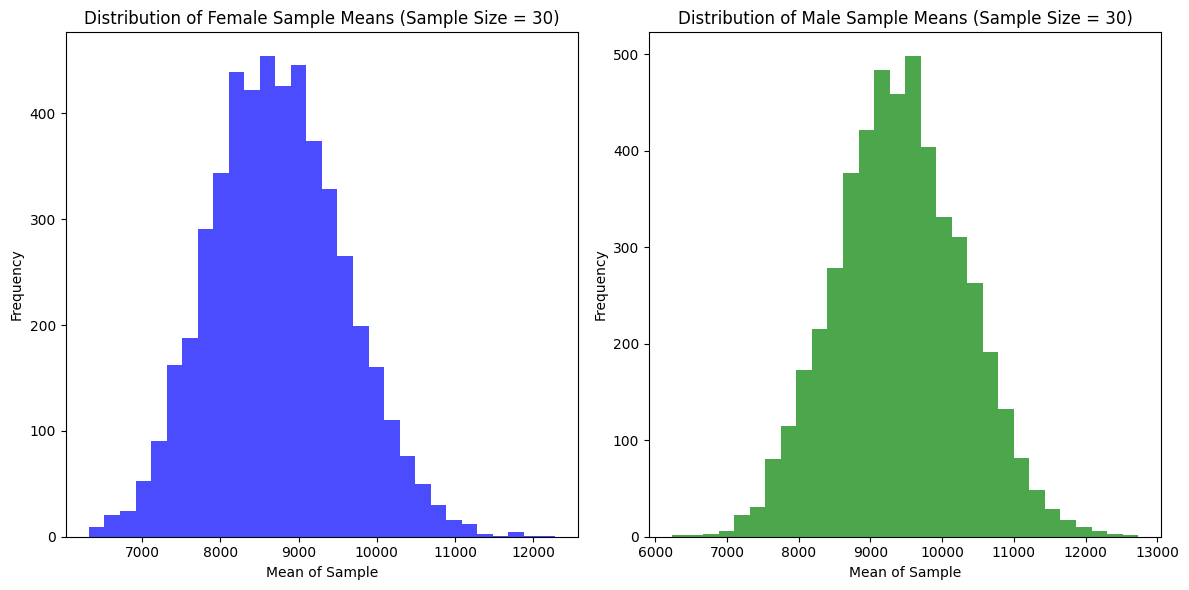

90% Confidence Interval for Female (Sample Size = 30): (8480.031842889337, 8991.046690443993)
90% Confidence Interval for Male (Sample Size = 30): (9148.3364986633, 9687.591208003365)



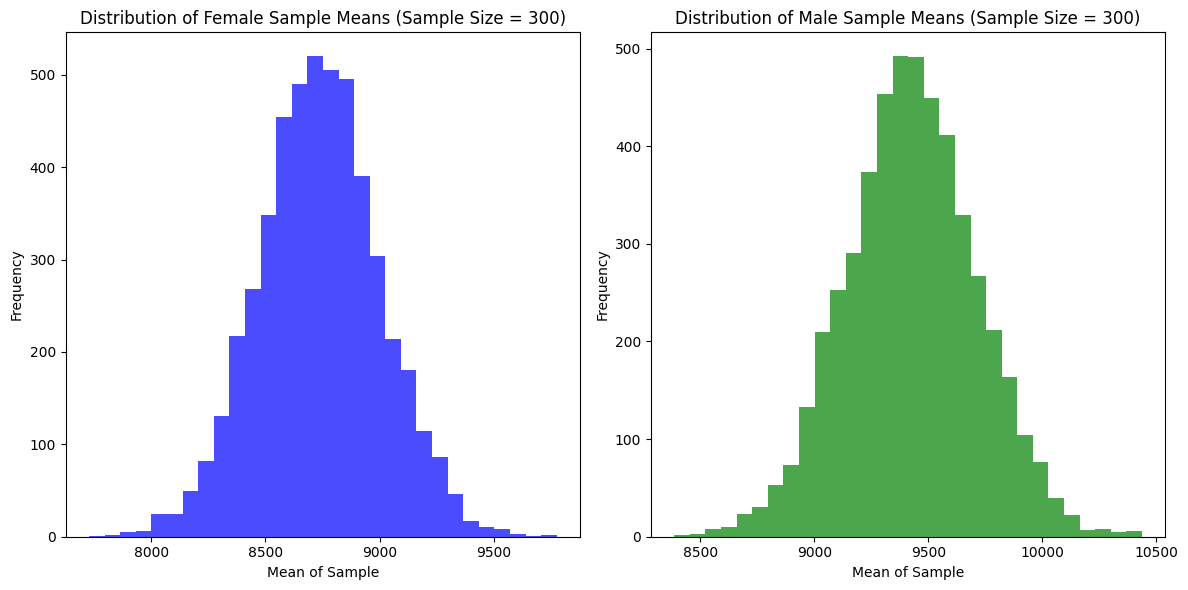

90% Confidence Interval for Female (Sample Size = 300): (8711.475095267024, 8761.93189939964)
90% Confidence Interval for Male (Sample Size = 300): (9398.929162081715, 9453.559721918284)



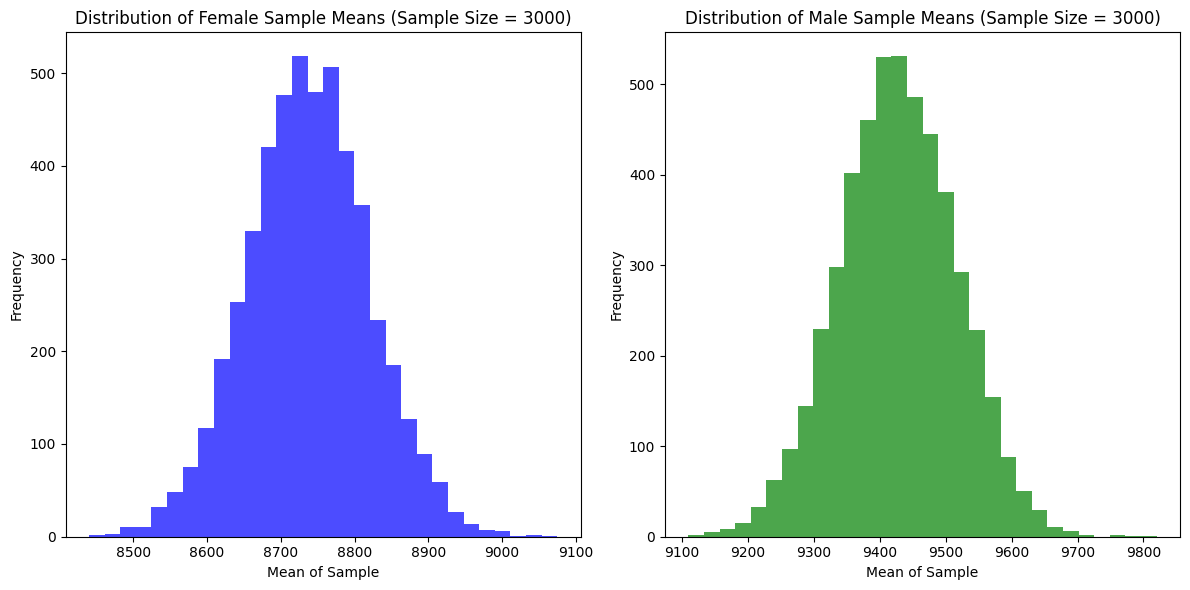

90% Confidence Interval for Female (Sample Size = 3000): (8734.787925490225, 8739.786386909775)
90% Confidence Interval for Male (Sample Size = 3000): (9424.77712915229, 9430.137304581045)



In [ ]:
for sample_size in sample_sizes:
    female_sample_means = simulate_sampling(female_spending, num_samples, sample_size)
    male_sample_means = simulate_sampling(male_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(female_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Female Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(male_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Male Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    female_mean = np.mean(female_sample_means)
    female_se = np.std(female_sample_means) / np.sqrt(sample_size)
    female_ci = stats.norm.interval(0.90, loc=female_mean, scale=female_se)

    male_mean = np.mean(male_sample_means)
    male_se = np.std(male_sample_means) / np.sqrt(sample_size)
    male_ci = stats.norm.interval(0.90, loc=male_mean, scale=male_se)

    print(f'90% Confidence Interval for Female (Sample Size = {sample_size}): {female_ci}')
    print(f'90% Confidence Interval for Male (Sample Size = {sample_size}): {male_ci}\n')


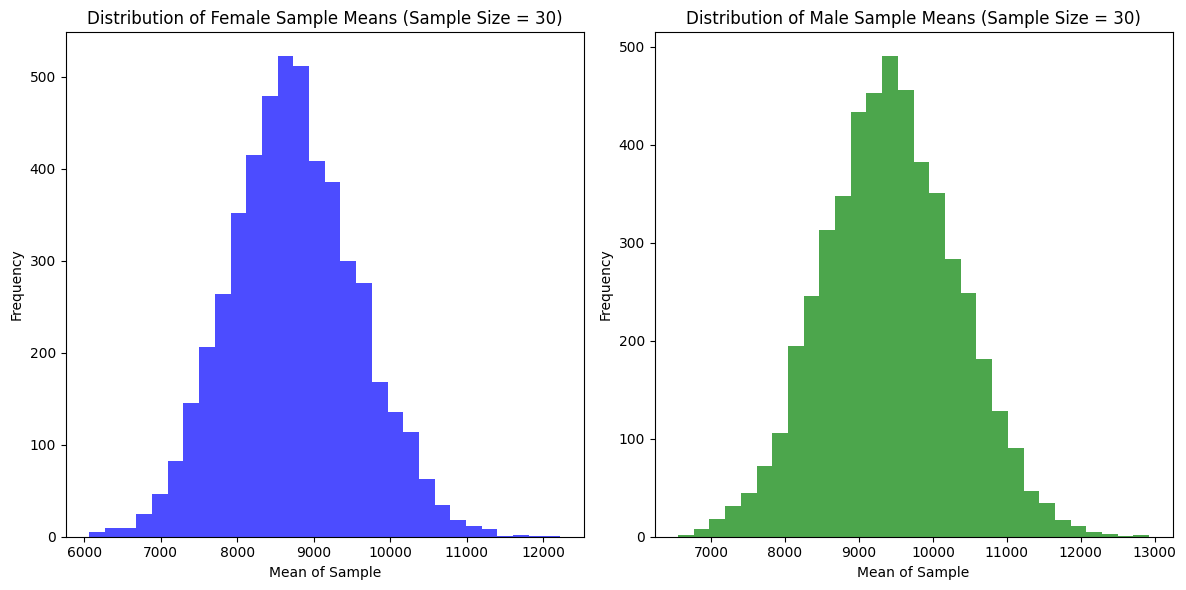

95% Confidence Interval for Female (Sample Size = 30): (8441.511410646679, 9037.625416019986)
95% Confidence Interval for Male (Sample Size = 30): (9105.844192432965, 9753.991940900365)



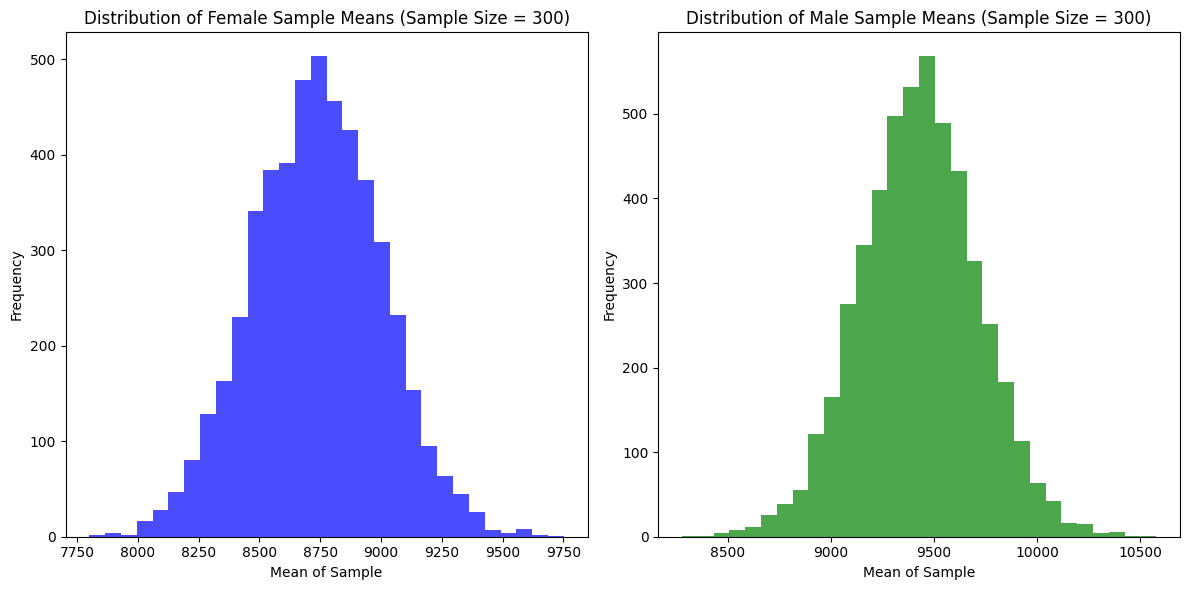

95% Confidence Interval for Female (Sample Size = 300): (8705.974390153826, 8766.105849846173)
95% Confidence Interval for Male (Sample Size = 300): (9393.379587833406, 9458.286376166594)



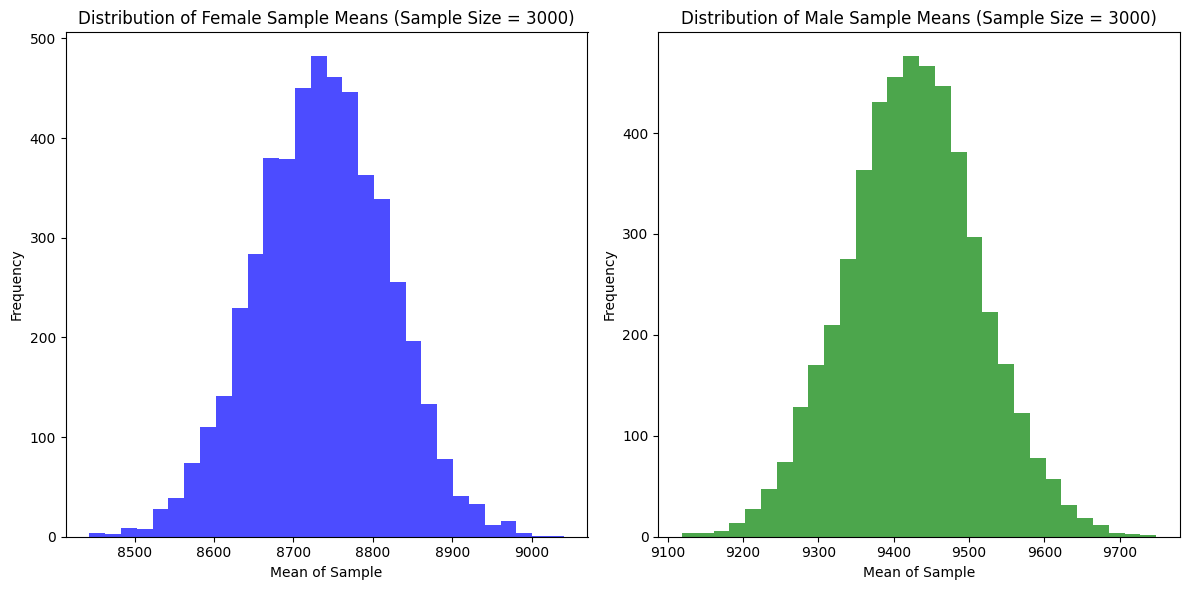

95% Confidence Interval for Female (Sample Size = 3000): (8733.468386258623, 8739.412305874708)
95% Confidence Interval for Male (Sample Size = 3000): (9422.45985337089, 9428.784093295775)



In [ ]:
for sample_size in sample_sizes:
    female_sample_means = simulate_sampling(female_spending, num_samples, sample_size)
    male_sample_means = simulate_sampling(male_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(female_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Female Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(male_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Male Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    female_mean = np.mean(female_sample_means)
    female_se = np.std(female_sample_means) / np.sqrt(sample_size)
    female_ci = stats.norm.interval(0.95, loc=female_mean, scale=female_se)

    male_mean = np.mean(male_sample_means)
    male_se = np.std(male_sample_means) / np.sqrt(sample_size)
    male_ci = stats.norm.interval(0.95, loc=male_mean, scale=male_se)

    print(f'95% Confidence Interval for Female (Sample Size = {sample_size}): {female_ci}')
    print(f'95% Confidence Interval for Male (Sample Size = {sample_size}): {male_ci}\n')


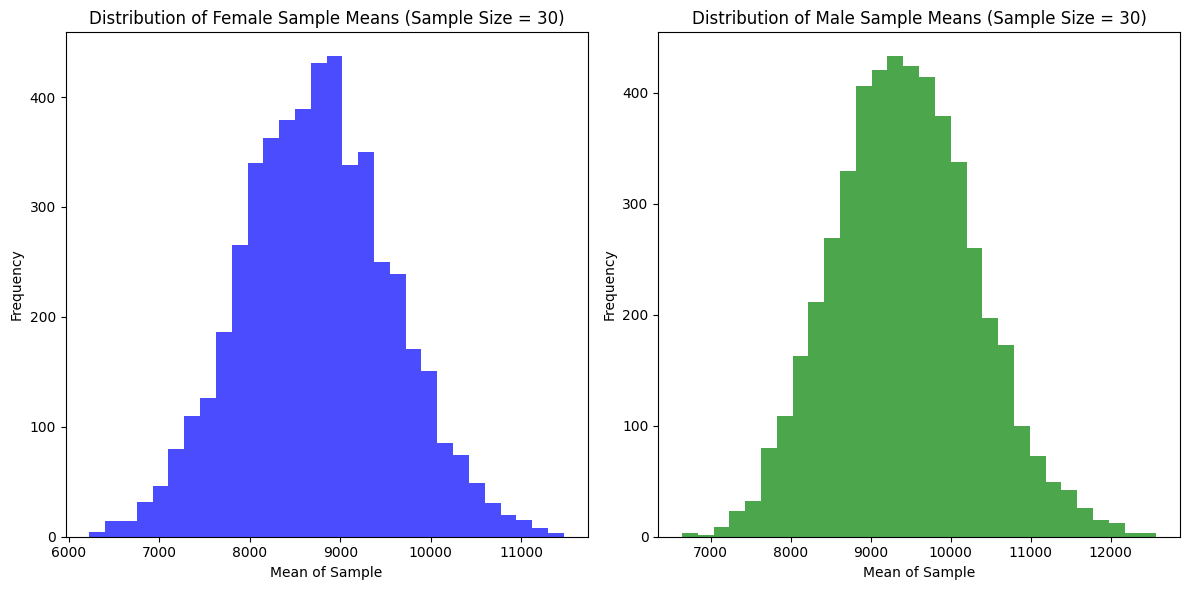

99% Confidence Interval for Female (Sample Size = 30): (8444.110962957091, 9038.385063709573)
99% Confidence Interval for Male (Sample Size = 30): (9018.917228836463, 9852.611704496869)



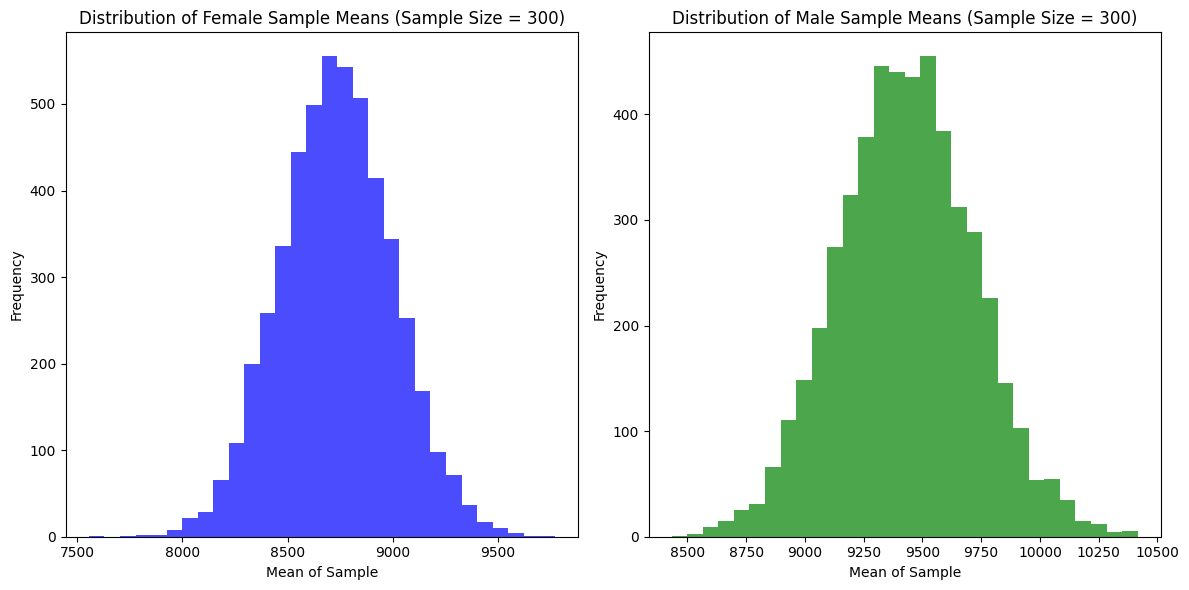

99% Confidence Interval for Female (Sample Size = 300): (8703.35108799944, 8763.944176000561)
99% Confidence Interval for Male (Sample Size = 300): (9388.071421524905, 9474.15172914176)



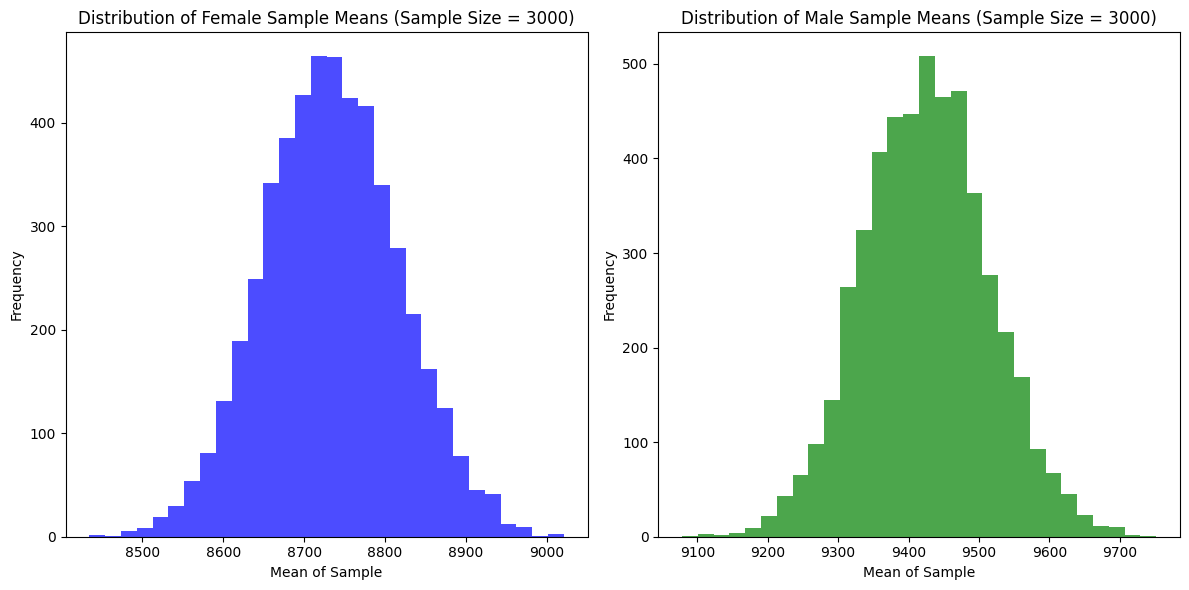

99% Confidence Interval for Female (Sample Size = 3000): (8730.889566910286, 8736.855668956381)
99% Confidence Interval for Male (Sample Size = 3000): (9420.68577656256, 9429.104112637442)



In [ ]:
for sample_size in sample_sizes:
    female_sample_means = simulate_sampling(female_spending, num_samples, sample_size)
    male_sample_means = simulate_sampling(male_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(female_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Female Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(male_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Male Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    female_mean = np.mean(female_sample_means)
    female_se = np.std(female_sample_means) / np.sqrt(sample_size)
    female_ci = stats.norm.interval(0.95, loc=female_mean, scale=female_se)

    male_mean = np.mean(male_sample_means)
    male_se = np.std(male_sample_means) / np.sqrt(sample_size)
    male_ci = stats.norm.interval(0.99, loc=male_mean, scale=male_se)

    print(f'99% Confidence Interval for Female (Sample Size = {sample_size}): {female_ci}')
    print(f'99% Confidence Interval for Male (Sample Size = {sample_size}): {male_ci}\n')

Distribution of Sample Means: As the sample size increases, the distribution of the sample means becomes narrower and more normally distributed, confirming the Central Limit Theorem.

Confidence Interval: As the sample size increases, the confidence interval becomes narrower, indicating a more precise estimate of the population mean.

<h1>Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

- From the above analysis, it is clear that the confidence intervals for the male and female customers are not over lapping.

- It indicates that there is a statistically significant difference in spending patterns between the genders.

- Walmart can infer that male and female customers have distinct spending behaviors. This can guide targeted marketing strategies, such as personalized promotions or product offerings tailored to each gender.

- Walmart can develop gender-specific marketing strategies. For example, if females spend more on certain categories, Walmart can promote those products more aggressively towards female customers.

- Walmart could adjust its product assortment based on the spending tendencies of each gender. For example, increasing inventory in categories where female customers spend more, or introducing more products that are popular with male customers.

- Walmart might consider dynamic pricing, offering discounts or promotions on products that are more appealing to one gender to drive sales.

- Walmart could consider gender-based store layouts or online experiences, making it easier for each gender to find and purchase products they are more likely to spend on.

<h1>Married vs Unmarried

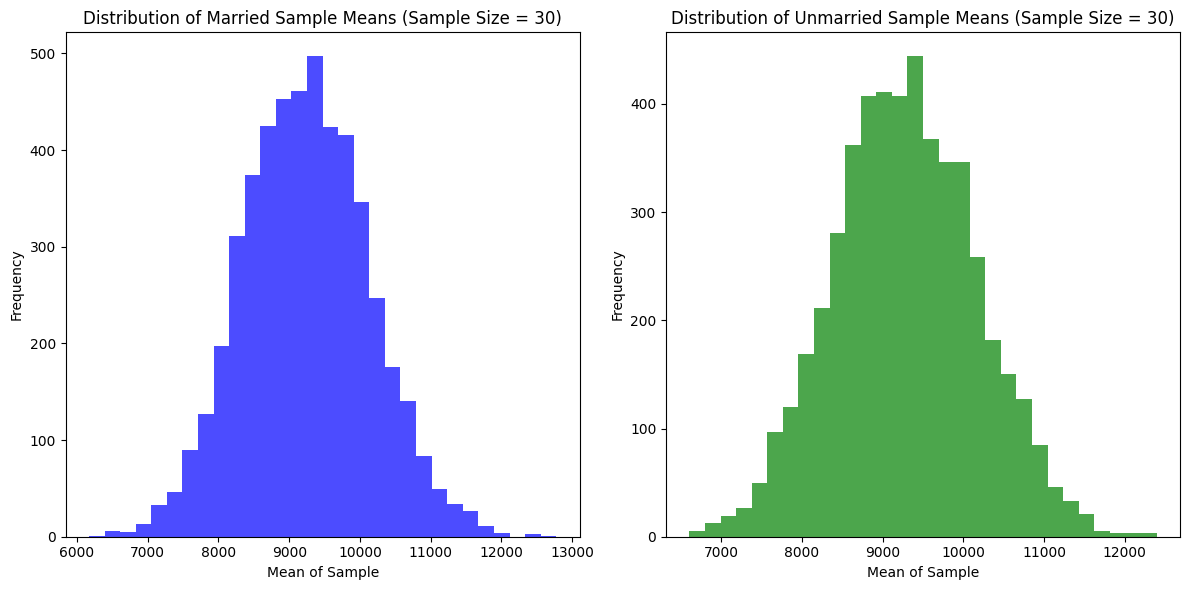

90% Confidence Interval for Married (Sample Size = 30): (8972.799099357788, 9507.275273975549)
90% Confidence Interval for Unmarried (Sample Size = 30): (9016.850882164203, 9546.933917835799)



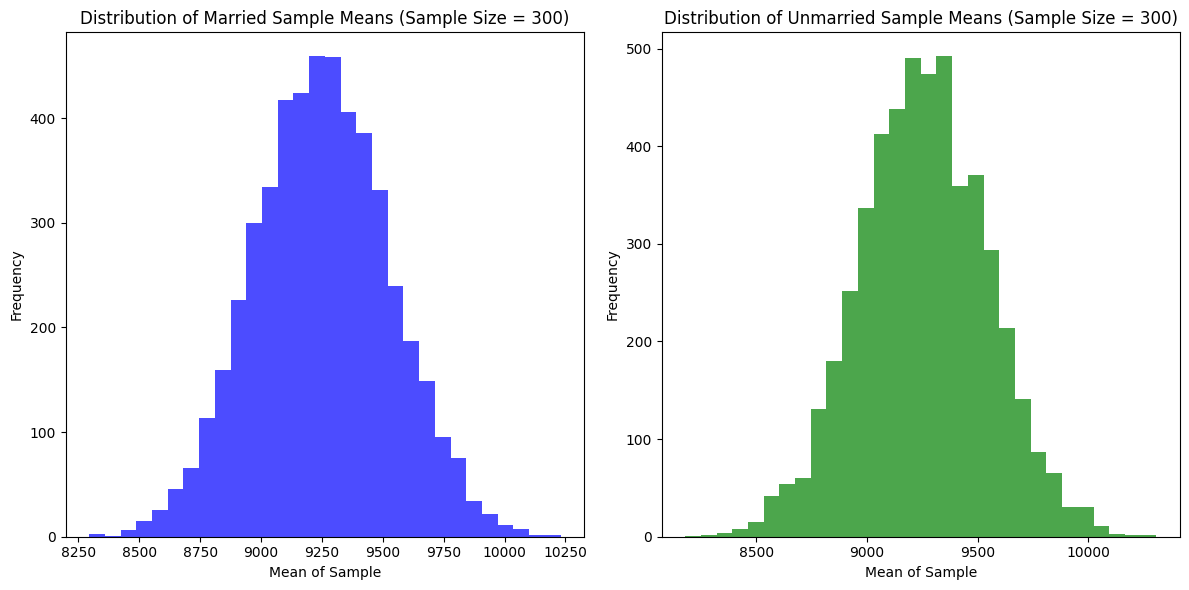

90% Confidence Interval for Married (Sample Size = 300): (9223.69367071199, 9276.504786621343)
90% Confidence Interval for Unmarried (Sample Size = 300): (9227.382390850815, 9282.306421149186)



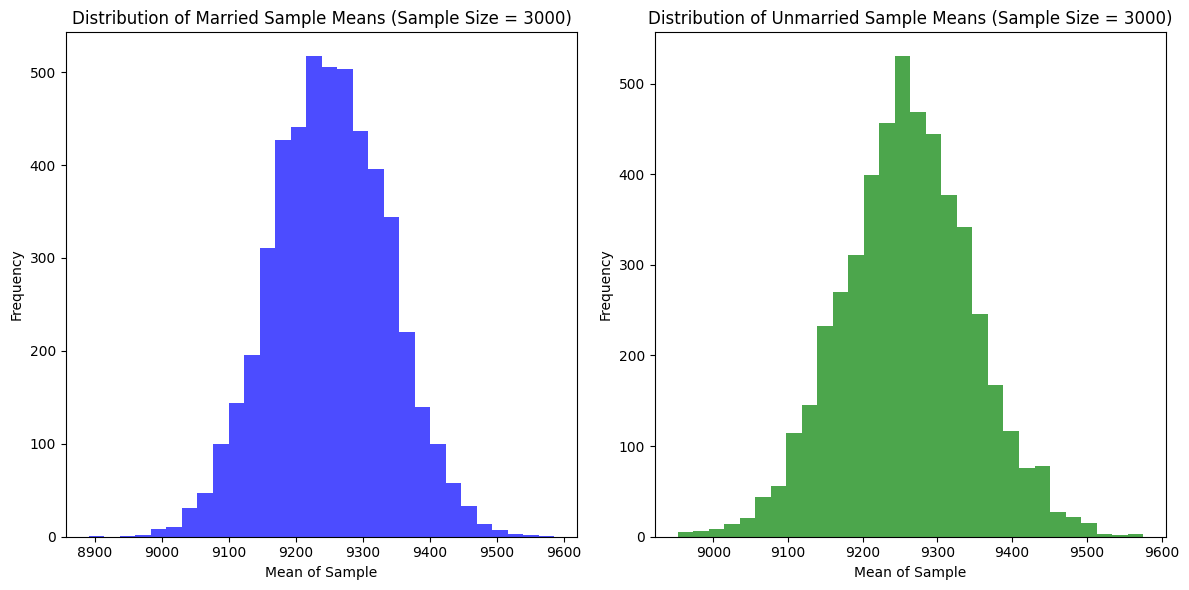

90% Confidence Interval for Married (Sample Size = 3000): (9248.812973449672, 9254.01616655033)
90% Confidence Interval for Unmarried (Sample Size = 3000): (9256.782889190263, 9262.013548276404)



In [ ]:
married_spending = df1[df1['Marital_Status'] == 1]['Purchase']
unmarried_spending = df1[df1['Marital_Status'] == 0]['Purchase']

for sample_size in sample_sizes:
    married_sample_means = simulate_sampling(married_spending, num_samples, sample_size)
    unmarried_sample_means = simulate_sampling(unmarried_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(married_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Married Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(unmarried_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Unmarried Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    married_mean = np.mean(married_sample_means)
    married_se = np.std(married_sample_means) / np.sqrt(sample_size)
    married_ci = stats.norm.interval(0.90, loc=married_mean, scale=married_se)

    unmarried_mean = np.mean(unmarried_sample_means)
    unmarried_se = np.std(unmarried_sample_means) / np.sqrt(sample_size)
    unmarried_ci = stats.norm.interval(0.90, loc=unmarried_mean, scale=unmarried_se)

    print(f'90% Confidence Interval for Married (Sample Size = {sample_size}): {married_ci}')
    print(f'90% Confidence Interval for Unmarried (Sample Size = {sample_size}): {unmarried_ci}\n')

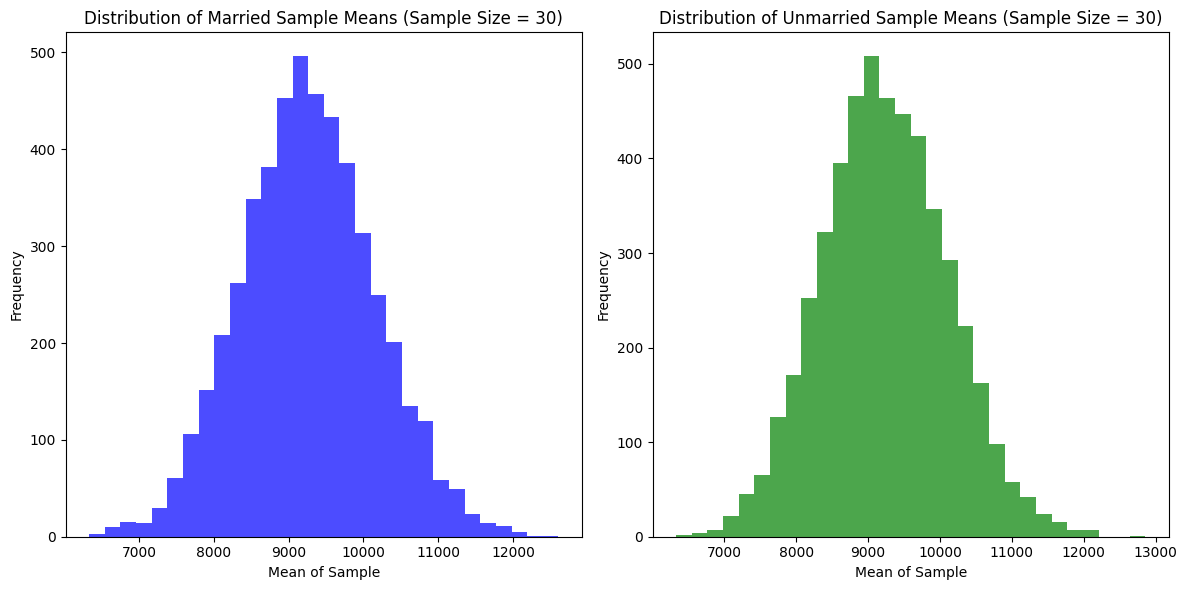

95% Confidence Interval for Married (Sample Size = 30): (8996.077604063985, 9531.840635936014)
95% Confidence Interval for Unmarried (Sample Size = 30): (8925.768056045881, 9553.487183954121)



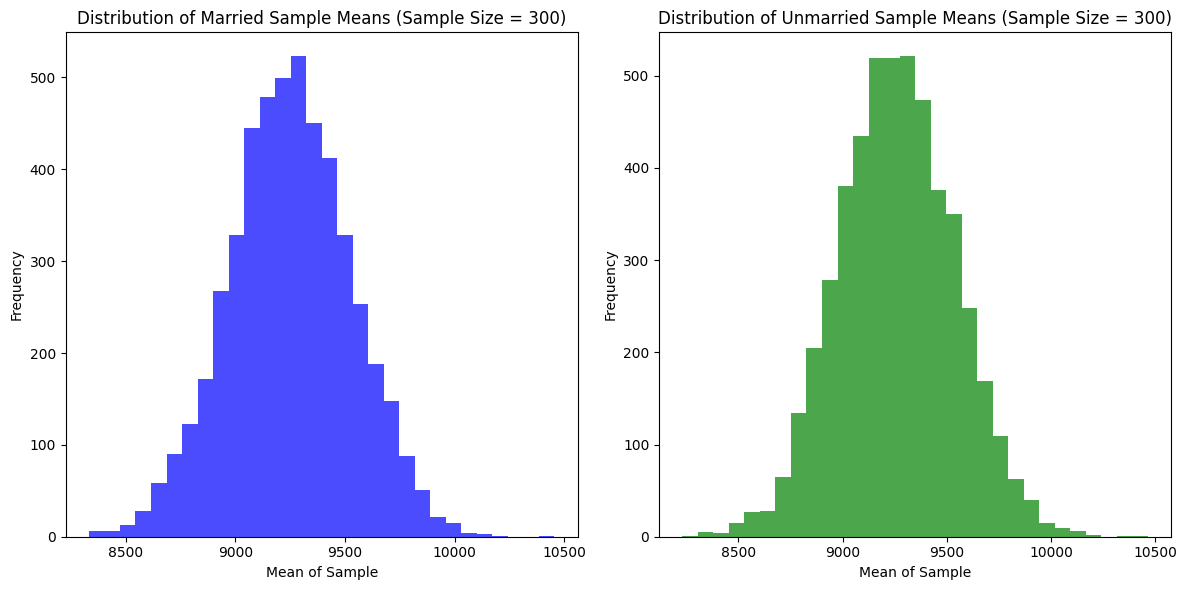

95% Confidence Interval for Married (Sample Size = 300): (9225.10740129436, 9277.74835470564)
95% Confidence Interval for Unmarried (Sample Size = 300): (9227.908104757928, 9290.893168575407)



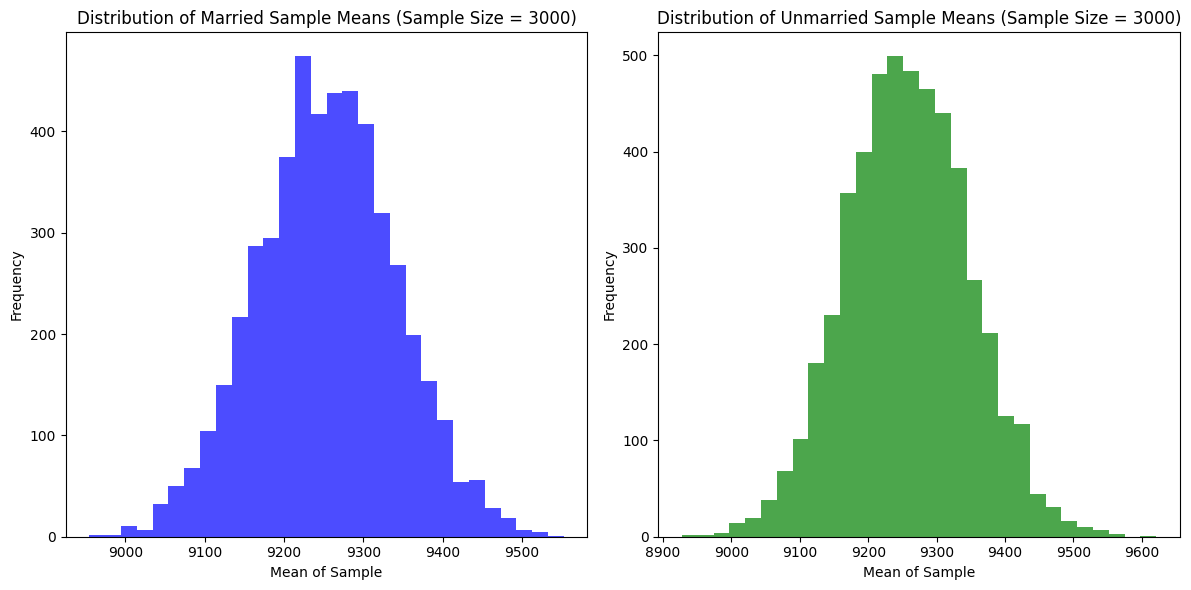

95% Confidence Interval for Married (Sample Size = 3000): (9251.255401244956, 9256.507321688377)
95% Confidence Interval for Unmarried (Sample Size = 3000): (9254.375203478237, 9260.821893055097)



In [ ]:
for sample_size in sample_sizes:
    married_sample_means = simulate_sampling(married_spending, num_samples, sample_size)
    unmarried_sample_means = simulate_sampling(unmarried_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(married_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Married Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(unmarried_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Unmarried Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    married_mean = np.mean(married_sample_means)
    married_se = np.std(married_sample_means) / np.sqrt(sample_size)
    married_ci = stats.norm.interval(0.90, loc=married_mean, scale=married_se)

    unmarried_mean = np.mean(unmarried_sample_means)
    unmarried_se = np.std(unmarried_sample_means) / np.sqrt(sample_size)
    unmarried_ci = stats.norm.interval(0.95, loc=unmarried_mean, scale=unmarried_se)

    print(f'95% Confidence Interval for Married (Sample Size = {sample_size}): {married_ci}')
    print(f'95% Confidence Interval for Unmarried (Sample Size = {sample_size}): {unmarried_ci}\n')

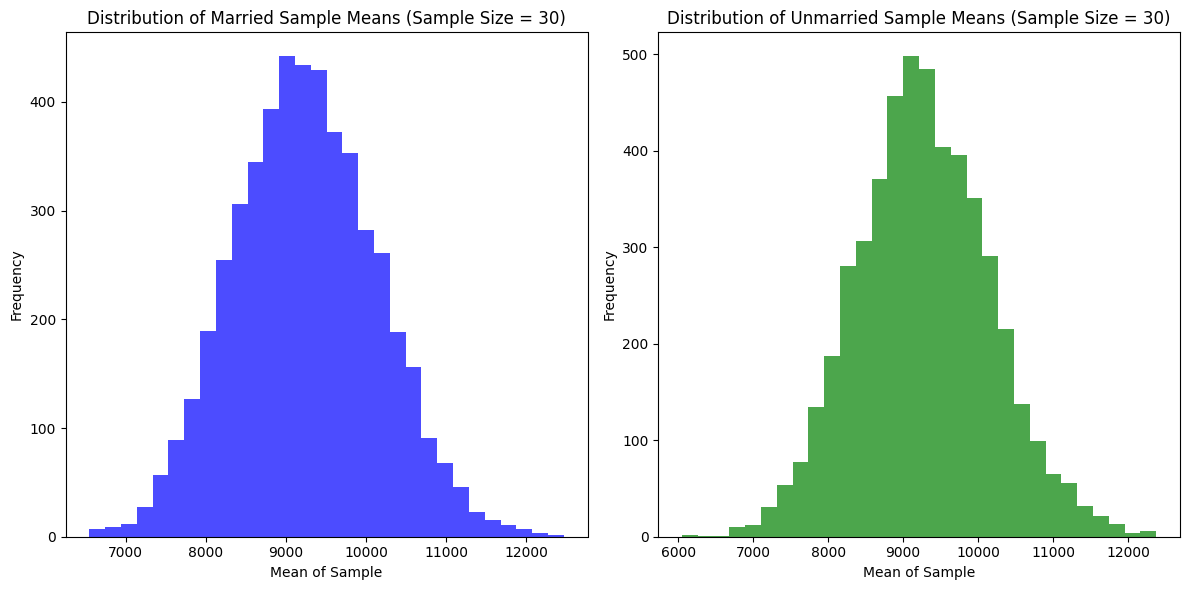

99% Confidence Interval for Married (Sample Size = 30): (8976.03379355569, 9511.640339777643)
99% Confidence Interval for Unmarried (Sample Size = 30): (8853.398431501355, 9693.40886183198)



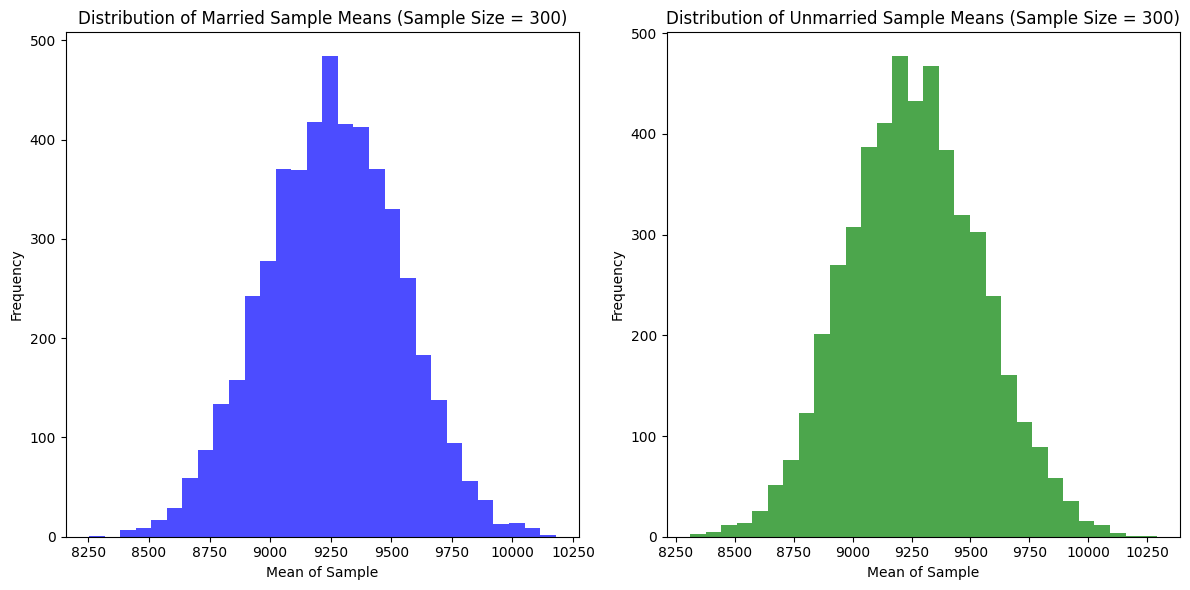

99% Confidence Interval for Married (Sample Size = 300): (9230.885108021537, 9284.24659864513)
99% Confidence Interval for Unmarried (Sample Size = 300): (9218.669368208848, 9302.855289124484)



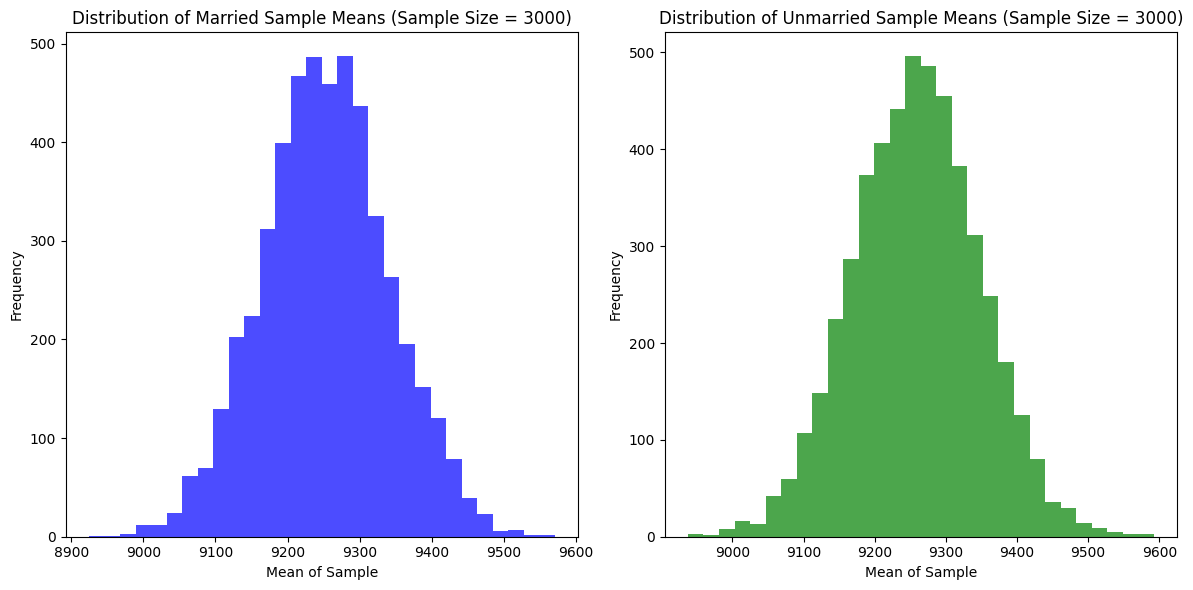

99% Confidence Interval for Married (Sample Size = 3000): (9250.197546849133, 9255.493704617536)
99% Confidence Interval for Unmarried (Sample Size = 3000): (9254.31466728117, 9262.722706718829)



In [ ]:
for sample_size in sample_sizes:
    married_sample_means = simulate_sampling(married_spending, num_samples, sample_size)
    unmarried_sample_means = simulate_sampling(unmarried_spending, num_samples, sample_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(married_sample_means, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of Married Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(unmarried_sample_means, bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of Unmarried Sample Means (Sample Size = {sample_size})')
    plt.xlabel('Mean of Sample')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


    married_mean = np.mean(married_sample_means)
    married_se = np.std(married_sample_means) / np.sqrt(sample_size)
    married_ci = stats.norm.interval(0.90, loc=married_mean, scale=married_se)

    unmarried_mean = np.mean(unmarried_sample_means)
    unmarried_se = np.std(unmarried_sample_means) / np.sqrt(sample_size)
    unmarried_ci = stats.norm.interval(0.99, loc=unmarried_mean, scale=unmarried_se)

    print(f'99% Confidence Interval for Married (Sample Size = {sample_size}): {married_ci}')
    print(f'99% Confidence Interval for Unmarried (Sample Size = {sample_size}): {unmarried_ci}\n')

- From the above analysis, the confidence interval for married and unmarried over lapping on each other.

- It suggests that there is no strong evidence of a difference in average spending between married and unmarried customers.

-  Walmart may not need to differentiate marketing strategies based on Marital status, focusing instead on other factors like product type, age group, or geographical location.

- Walmart might choose to stock products that are universally appealing, ensuring a balanced inventory that caters to both married and unmarried customers.

- Walmart could implement uniform pricing strategies, knowing that both marital status respond similarly to price changes.

- Walmart can design store layouts that are neutral (marital status), focusing on ease of access and product visibility for all customers.

<h1>Age

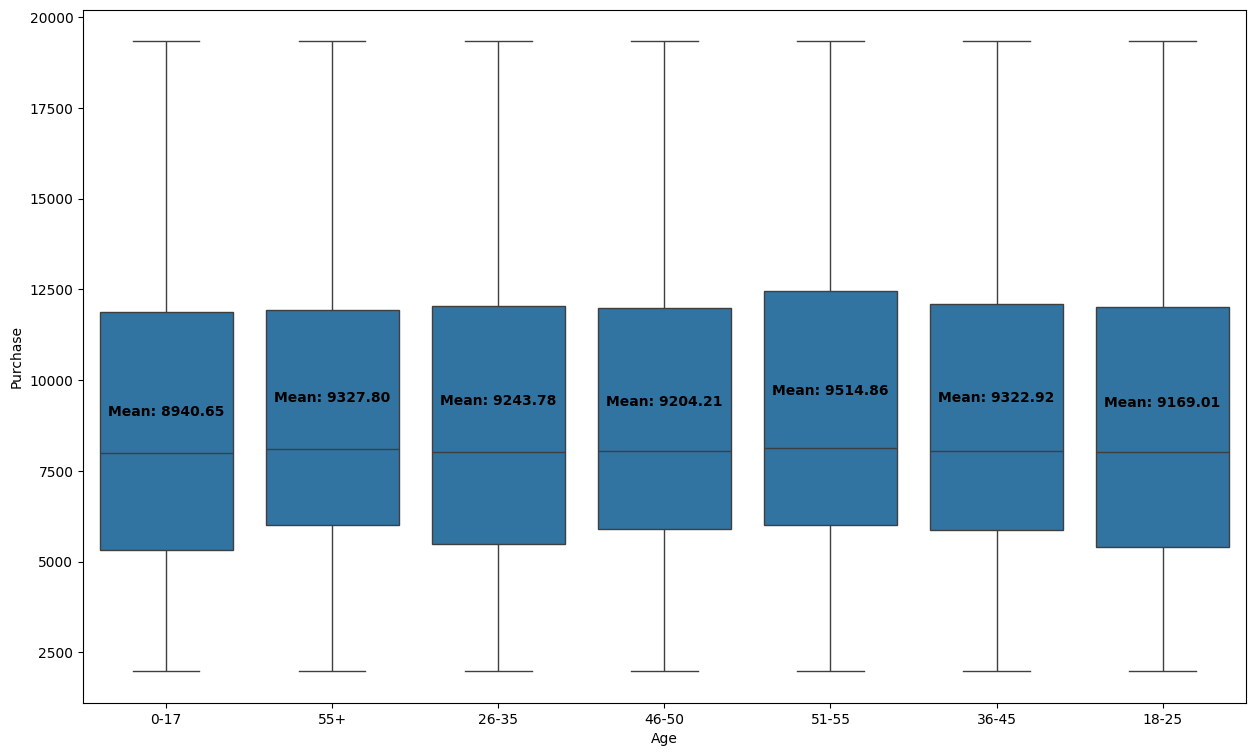

In [ ]:
plt.figure(figsize=(15, 9))
sns.boxplot(data = df1, x = "Age", y = "Purchase")
mean_values = df1.groupby('Age')['Purchase'].mean()
for age in mean_values.index:
    plt.annotate(f'Mean: {mean_values[age]:.2f}',
                 xy=(age, mean_values[age]),
                 xytext=(age, mean_values[age] + 5),
                 ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

From the above analysis for age, the average spending for all the age groups almost similar.

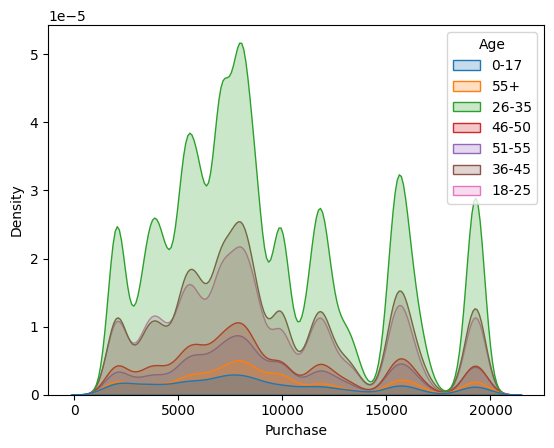

In [ ]:
sns.kdeplot(data = df1, x = "Purchase", hue = "Age", fill = True)
plt.show()

From the above graph, it is clear that the purchase amount mean is not normally distributed among the different age groups.

In [ ]:
a = df1[df1['Age'] == '0-17']['Purchase']
b = df1[df1['Age'] == '18-25']['Purchase']
c = df1[df1['Age'] == '26-35']['Purchase']
d = df1[df1['Age'] == '36-45']['Purchase']
e = df1[df1['Age'] == '46-50']['Purchase']
f = df1[df1['Age'] == '51-55']['Purchase']
g = df1[df1['Age'] == '55+']['Purchase']

stat, p_value = kruskal(a, b, c, d, e, f, g)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"p-value: {p_value}")

Kruskal-Wallis Test Statistic: 316.4269448324082
p-value: 2.46438599591188e-65


In [ ]:
statistic, pvalue_levene = levene(a, b, c, d, e, f, g)
print('Levene test p-value:', pvalue_levene)

Levene test p-value: 2.4089831185669614e-18


Since the P_value is very less than 0.01 siginifance level, atleast one of the median of the purchase amount is different among the all age groups.

<h2> T-test analysis for different age groups

In [ ]:
li = [(a, 'a'), (b, 'b'), (c, 'c'), (d, 'd'), (e, 'e'), (f, 'f'), (g, 'g')]

for i in range(len(li)):
    for j in range(i+1, len(li)):
        t_stat, p_value = ttest_ind(li[i][0], li[j][0])
        print(f"P-value for {li[i][1]} vs {li[j][1]}: {p_value}")
        p_values.append(p_value)

        if p_value < 0.01:
            print(f"Mean for {li[i][1]} vs {li[j][1]} are different")
        else:
            print(f"Mean for {li[i][1]} vs {li[j][1]} are not different")

P-value for a vs b: 9.24780800277167e-08
Mean for a vs b are different
P-value for a vs c: 1.2374433719441918e-13
Mean for a vs c are different
P-value for a vs d: 1.2511766028692978e-19
Mean for a vs d are different
P-value for a vs e: 5.9154753390416615e-09
Mean for a vs e are different
P-value for a vs f: 2.588529750468243e-34
Mean for a vs f are different
P-value for a vs g: 5.457409718987201e-14
Mean for a vs g are different
P-value for b vs c: 5.745443104774875e-05
Mean for b vs c are different
P-value for b vs d: 4.826112763709447e-13
Mean for b vs d are different
P-value for b vs e: 0.19955449362883126
Mean for b vs e are not different
P-value for b vs f: 4.1169646189717254e-32
Mean for b vs f are different
P-value for b vs g: 1.4514865212013256e-05
Mean for b vs g are different
P-value for c vs d: 1.0091325892582545e-05
Mean for c vs d are different
P-value for c vs e: 0.11206968398444146
Mean for c vs e are not different
P-value for c vs f: 5.602787400997221e-24
Mean for c vs

From the above T-test analysis, the mean of purchase amount spent,

- 18-25 vs 46-50 are not different
- 26-35 vs 46-50 are not different
- 26-35 vs 55+ are not different
- 36-45 vs 55+ are not different

And the rest of the age groups are significantly different.

<h1>Insights & Recommendations


- The average amount spent by male customers are slightly higher than the female customers.

- From the above analysis, it is clear that the confidence intervals for the male and female customers are not over lapping.

- It indicates that there is a statistically significant difference in spending patterns between the genders.

- Walmart can infer that male and female customers have distinct spending behaviors. This can guide targeted marketing strategies, such as personalized promotions or product offerings tailored to each gender.

- Walmart can develop gender-specific marketing strategies. For example, if females spend more on certain categories, Walmart can promote those products more aggressively towards female customers.

- Walmart could adjust its product assortment based on the spending tendencies of each gender. For example, increasing inventory in categories where female customers spend more, or introducing more products that are popular with male customers.

- Walmart might consider dynamic pricing, offering discounts or promotions on products that are more appealing to one gender to drive sales.

- Walmart could consider gender-based store layouts or online experiences, making it easier for each gender to find and purchase products they are more likely to spend on.

- From the above analysis, the confidence interval for married and unmarried over lapping on each other.

- It suggests that there is no strong evidence of a difference in average spending between married and unmarried customers.

- Walmart may not need to differentiate marketing strategies based on Marital status, focusing instead on other factors like product type, age group, or geographical location.

- Walmart might choose to stock products that are universally appealing, ensuring a balanced inventory that caters to both married and unmarried customers.

- Walmart could implement uniform pricing strategies, knowing that both marital status respond similarly to price changes.

- Walmart can design store layouts that are neutral (marital status), focusing on ease of access and product visibility for all customers.

- From the above T-test analysis, the mean of purchase amount spent amoung the different age groups,
      18-25 vs 46-50 are not different
      26-35 vs 46-50 are not different
      26-35 vs 55+ are not different
      36-45 vs 55+ are not different
      And the rest of the age groups are significantly different.
  The age group 0-17 is significantly differs from the age groups. It could be possibly of the kids and teenagers.